In [126]:
import pandas as pd
import numpy as np

In [127]:
df = pd.read_csv('placement.csv')

In [128]:
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [129]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


one column here in unnecessary so we need to do preprocessing and remove it

In [130]:
df.shape

(100, 4)

this means 100 rows and 4 columns

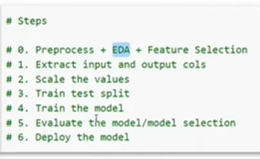

Train test split is simply we split the data set into two jalfs one will be trainign set and the other to be testing suppose 100 students we set 90 as training now the rest 10 will be for testing if the output gives correct as the ones which we got then we have our model trained perfectly

In [131]:
df = df.iloc[:,1:]

In [132]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


now we have our data pre processed and that extra unnecessary column is removed for now its manual

In [133]:
import matplotlib.pyplot as plt

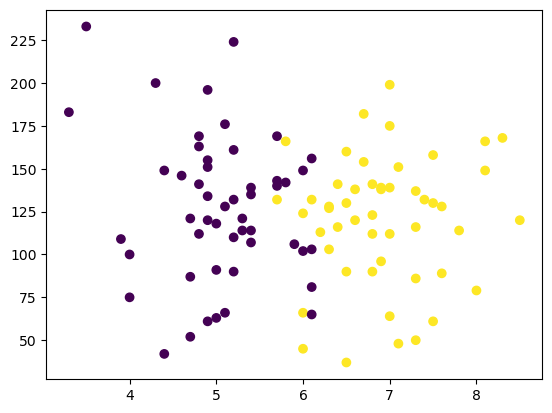

In [134]:
plt.scatter(df['cgpa'],df['iq'], c=df['placement'])

In [135]:
# we will be doing logistic regression

In [136]:
  x = df.iloc[:,0:2]
  y = df.iloc[:,-1]

In [137]:
x.head()

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0


In [138]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: placement, dtype: int64

In [139]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [140]:
from sklearn.model_selection import train_test_split

In [141]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1)

In [142]:
x_test

,cgpa,iq
55,7.8,114.0
40,4.9,134.0
67,5.0,118.0
63,6.3,128.0
13,6.4,116.0
52,7.0,175.0
99,6.2,113.0
31,3.9,109.0
95,4.3,200.0
72,7.3,116.0


## scaling

In [143]:
from sklearn.preprocessing import StandardScaler

## transforming the data into an scalable array format

In [144]:
scaler = StandardScaler() 

In [145]:
x_train = scaler.fit_transform(x_train)  


In [146]:
x_train

array([[-0.97840609,  0.69841741],
       [ 0.62262206,  1.46107282],
       [-1.0673521 ,  0.45239954],
       [ 0.71156807, -0.80229163],
       [ 0.08894601,  0.23098345],
       [ 0.62262206,  0.77222277],
       [ 1.33419013,  0.18177987],
       [ 0.        , -0.50707018],
       [-0.08894601, -0.40866303],
       [ 2.04575819,  1.1166478 ],
       [-1.42313613, -1.98317743],
       [-1.0673521 ,  0.99363886],
       [ 0.44473004, -0.80229163],
       [-0.80051408,  0.1325763 ],
       [-1.0673521 , -0.2610523 ],
       [ 1.33419013, -1.51574346],
       [-0.17789202,  1.06744422],
       [ 0.44473004,  0.9198335 ],
       [ 0.44473004, -2.10618636],
       [ 0.08894601, -0.48246839],
       [ 1.42313613, -0.82689341],
       [-0.97840609,  1.80549785],
       [-0.53367605, -0.21184873],
       [-1.77892017, -0.55627375],
       [-0.62262206, -0.03963621],
       [-0.26683803,  0.50160311],
       [ 0.35578403,  0.45239954],
       [ 0.71156807,  0.45239954],
       [-0.26683803,

In [147]:
x_test = scaler.transform(x_test)

In [148]:
x_test

array([[ 1.60102815, -0.21184873],
       [-0.97840609,  0.28018702],
       [-0.88946008, -0.11344158],
       [ 0.26683803,  0.1325763 ],
       [ 0.35578403, -0.16264515],
       [ 0.88946008,  1.28886031],
       [ 0.17789202, -0.23645051],
       [-1.86786618, -0.33485766],
       [-1.51208214,  1.903905  ],
       [ 1.15629811, -0.16264515]])

In [149]:
from sklearn.linear_model import LogisticRegression

In [150]:
clf = LogisticRegression()

In [151]:
# model training
clf.fit(x_train,y_train)

LogisticRegression()

In [152]:
# model evaluation

In [154]:
y_pred = clf.predict(x_test)

In [156]:
y_pred

array([1, 0, 0, 1, 1, 1, 1, 0, 0, 1])

In [155]:
y_test

55    1
40    0
67    0
63    1
13    1
52    1
99    1
31    0
95    0
72    1
Name: placement, dtype: int64

# # our model correctly predicted the placements for the students

In [157]:
from sklearn.metrics import accuracy_score

In [158]:
accuracy_score(y_test,y_pred)

1.0

# now to visualize the boundary / rule that our model created

In [159]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

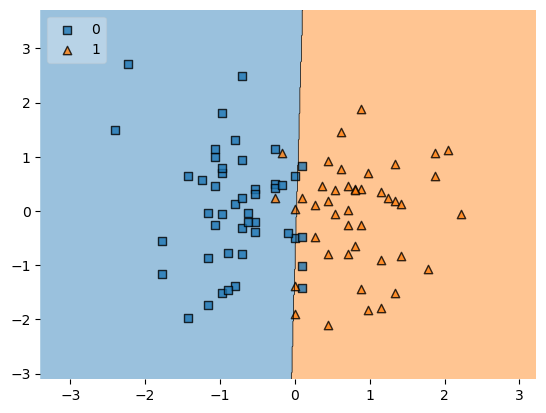

In [160]:
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)